In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

In [108]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()  #first 5 entries

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [111]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [112]:
dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in features:
    dataset.loc[dataset[i] == 0,i] = dataset[i].median()

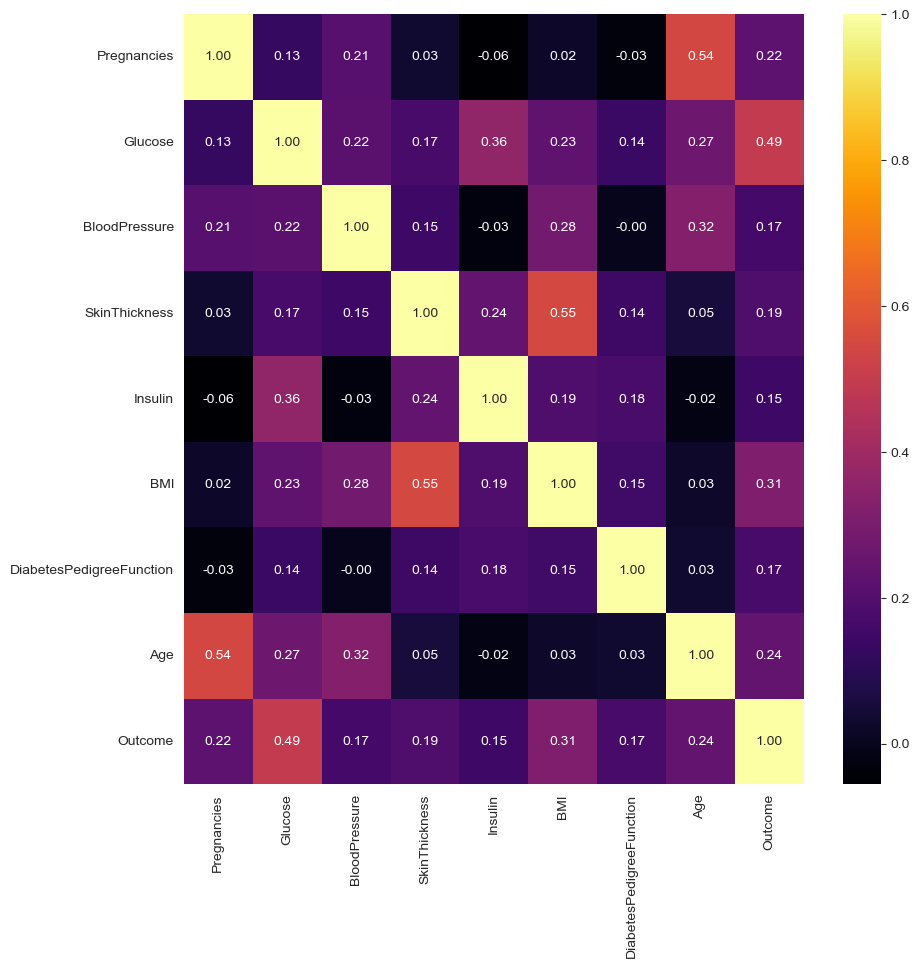

In [491]:
plt.figure(figsize = (10,10))

sns.heatmap(dataset.corr(),annot = True,fmt = ".2f",cmap = 'inferno')
plt.show()

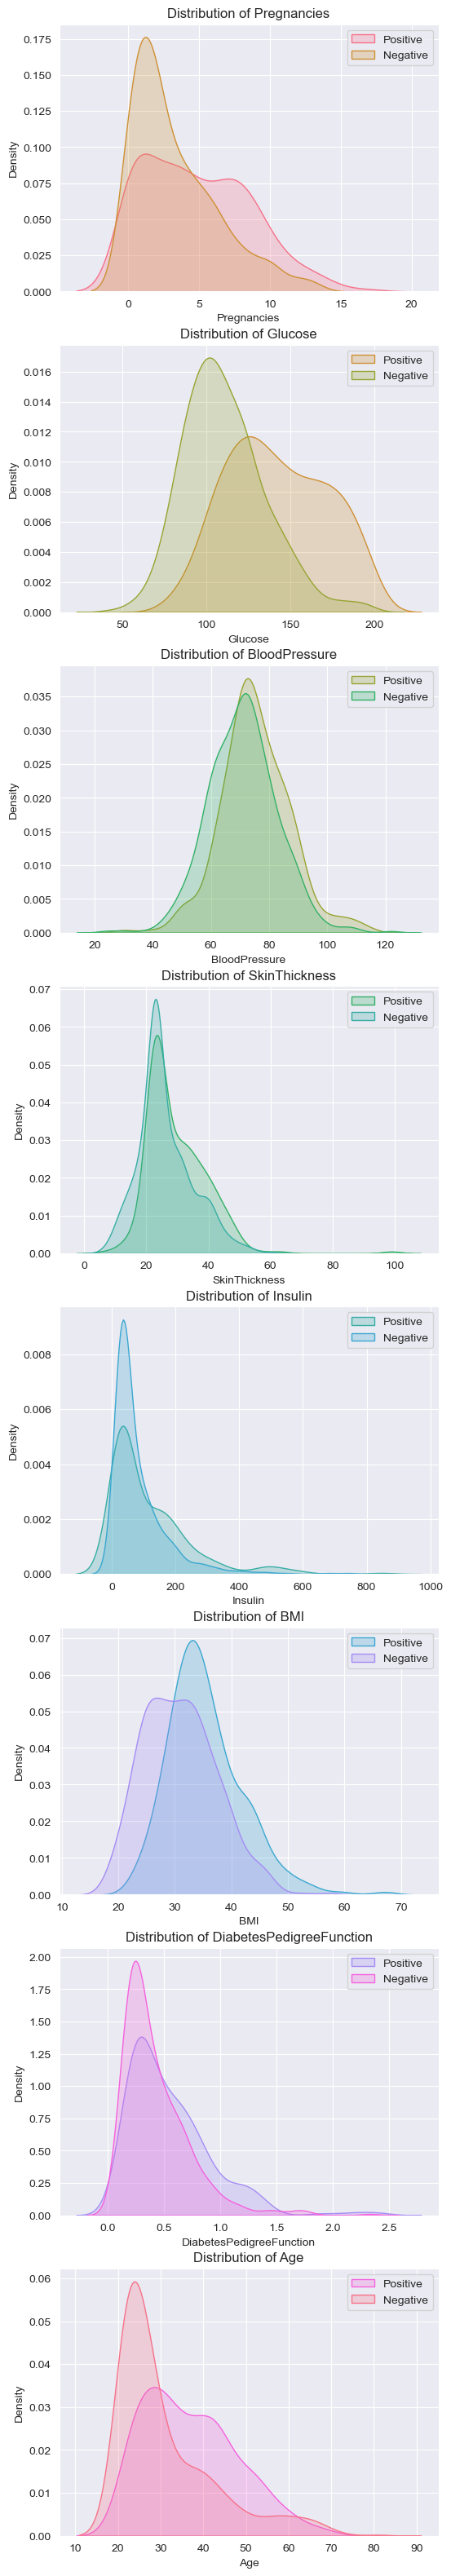

In [139]:
cols = dataset.columns
num_features = len(cols) - 1

fig,axes = plt.subplots(nrows = 8, ncols = 1,figsize = (6,40))
colors = sns.color_palette("husl", num_features)

for i in range(len(cols)-1):
    sns.kdeplot(dataset.query('Outcome == 1').iloc[:,i],fill = True,label = 'Positive',ax = axes[i],color = colors[i])
    sns.kdeplot(dataset.query('Outcome == 0').iloc[:,i],fill = True,label = 'Negative',ax = axes[i],color=colors[(i+1) % num_features])

    axes[i].legend()
    axes[i].set_title(f'Distribution of {cols[i]}')


In [141]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [143]:
y = dataset['Outcome']
x = dataset.drop('Outcome',axis = 1)

x.shape , y.shape

((768, 8), (768,))

In [147]:
#classification so we should use either Naive bayes , SVM, Decision Tree, Random Forest, Neural networks 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 29)

x_train.shape,x_test.shape

((614, 8), (154, 8))

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
train_acc = []
test_acc = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)

    train_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

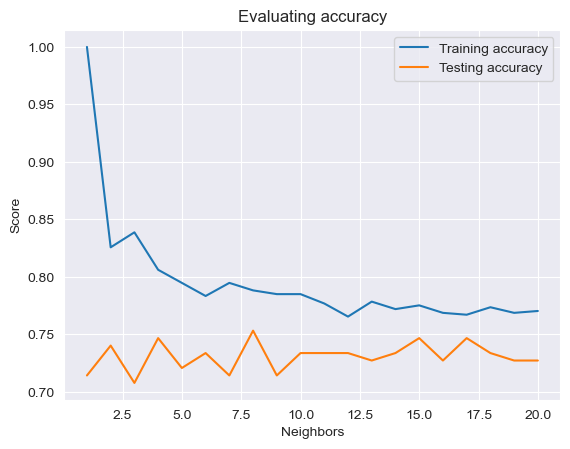

In [169]:
plt.plot(range(1,21),train_acc,label = 'Training accuracy')
plt.plot(range(1,21),test_acc,label = 'Testing accuracy')

plt.legend()
plt.title('Evaluating accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Score')

plt.show()

In [203]:
#selecting 3 neighbor and not 1 as it may overfit

index_test = test_acc.index(max(test_acc))
print(f'Index : {index_test},Max of testing : {max(test_acc)} then max of training : {train_acc[index_test]}')

index_train = train_acc.index(max(train_acc[1:]))
print(f'Index : {index_train}, Max of testing : {train_acc[index_train]} then max of training : {test_acc[index_train]}')


Index : 7,Max of testing : 0.7532467532467533 then max of training : 0.7882736156351792
Index : 2, Max of testing : 0.8387622149837134 then max of training : 0.7077922077922078


In [209]:
#choosing 7
model = KNeighborsClassifier(n_neighbors = 7)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [217]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       105
           1       0.56      0.51      0.53        49

    accuracy                           0.71       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.71      0.71      0.71       154



In [247]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

x_st = standard.fit_transform(x_train)
x_test_st = standard.fit_transform(x_test)

In [251]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 7)
dtc.fit(x_train,y_train)

print(dtc.score(x_train,y_train))
print(dtc.score(x_test,y_test))

0.8908794788273615
0.7662337662337663


In [241]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(1,15)}

grid = GridSearchCV(dtc,params,cv = 5)
grid.fit(x_test,y_test)

print(grid.best_params_)

{'max_depth': 7}


In [269]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 32)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train))
print(mlp.score(x_test,y_test))

0.7149837133550488
0.7077922077922078


In [273]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

params = {
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.1,1,10],
    'max_depth':[3,5,4]
}
grid = GridSearchCV(gbc,params,cv = 5)
grid.fit(x_train,y_train)

print(grid.best_params_)


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [487]:
gbc = GradientBoostingClassifier(learning_rate = 0.1,loss = 'exponential',n_estimators = 150)
gbc.fit(x_train,y_train)

print(gbc.score(x_train,y_train))
print(gbc.score(x_test,y_test))

0.9543973941368078
0.7792207792207793


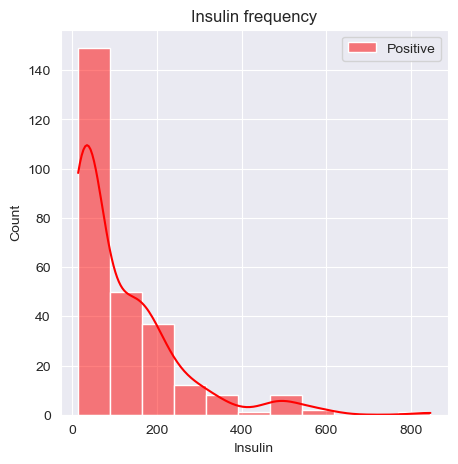

In [311]:
plt.figure(figsize = (5,5))
to_plot = dataset.query('Outcome == 1')['Insulin']
to = dataset.query('Outcome == 0')['Insulin']

sns.histplot(to_plot,kde = True,color = 'red',bins = 11,label = 'Positive')
#sns.histplot(to,kde = True,color = 'skyblue',bins = 10,label = 'Negative')

plt.title('Insulin frequency')
plt.legend()
plt.show()

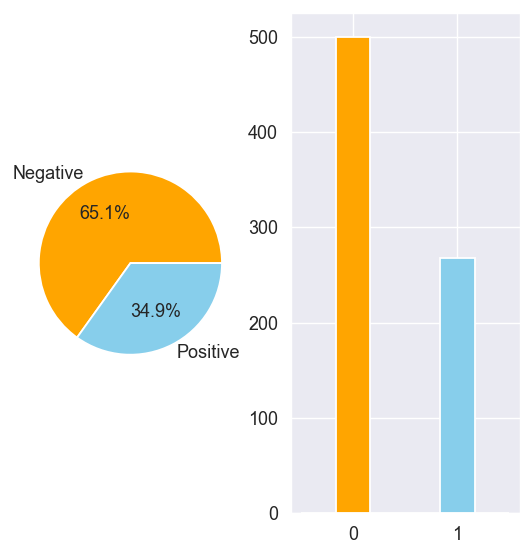

In [395]:
c = ['orange','skyblue']
lab = ['Negative','Positive']
counts = df['Outcome'].value_counts()

fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),dpi = 130)

yes_num = counts[0]/len(dataset) * 100
no_num = counts[1]/len(dataset) * 100


axes[0].pie([yes_num,no_num],autopct='%1.1f%%',colors = c,labels = lab)
axes[1].hist(dataset.query('Outcome == 1')['Outcome'],bins = 3,color = 'skyblue')
axes[1].hist(dataset.query('Outcome == 0')['Outcome'],bins = 3,color = 'orange')

plt.show()

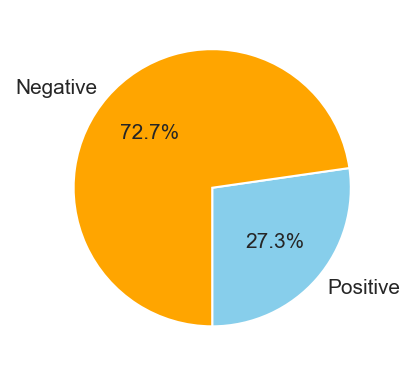

In [435]:
fig,axes = plt.subplots(figsize = (3,3),dpi = 150)

y_pred = gbc.predict(x_test)

to_plot = [np.sum(y_pred == 1)/len(y_pred) * 100 ,np.sum(y_pred == 0)/len(y_pred) * 100]
hist = []
axes.pie(to_plot,autopct='%1.1f%%',colors = ['skyblue','orange'],startangle = -90,labels = ['Positive','Negative'])
plt.show()

In [447]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
X_train = standard.fit_transform(x_train)
X_test = standard.fit_transform(x_test)

logistic = LogisticRegression()
logistic.fit(X_train,y_train)

y_logistic = logistic.predict(X_test)

In [449]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_logistic)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.61      0.61      0.61        49

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [471]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

params = {
    'criterion': ['gini','entropy'],
    'n_estimators': [100,200,50],
    'max_depth':[3,5,6],
    'max_features':['sqrt','log2']
}

grid = GridSearchCV(rfc,params,cv = 10,n_jobs = -1)
grid.fit(X_train,y_train)

print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}


In [485]:
rfc_optimal = RandomForestClassifier(criterion = 'gini',max_depth = 5,max_features = 'sqrt',min_samples_leaf = 5,min_samples_split = 7)

rfc_optimal.fit(x_train,y_train)
y_rfc = rfc_optimal.predict(x_test)

print(classification_report(y_test,y_rfc))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.64      0.59      0.62        49

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.76      0.77      0.76       154

